# 4.2 HarvardX PH526x Using Python for Research
## Case Study 5: Bird Migration
### Introduction to GPS Tracking of Birds
- Learn how <strong>GPS data</strong> can be used to <strong>track bird migration</strong> patterns
  
The data for this case study comes from the LifeWatch INBO project. Several data sets have been released as part of this project. We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne.  
  
The csv file contains eight columns, and includes variables like latitude, longitude, altitude, and time stamps.  
  


In [1]:
import os
os.chdir('D:\\Dev\\Python\\PythonForResearch\\videos\\4\\2 BirdMigration\\dataset')

import pandas as pd
birddata = pd.read_csv("bird_tracking.csv")
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [2]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Simple Data Visualizations
We'll get started by simply plotting the latitude and longitude of a flight trajectory for a single bird in a standard two dimensional plot. Latitude and longitude are coordinates along the surface of a sphere, where a standard 2-D plot is a plane
so we would expect very strong distortions for the flight trajectories. This is especially true because the trajectories
cover a large spatial region. We're doing this however, primarily to have a quick way to look at the data and develop more intuition about it. We'll be doing an actual cartographic projection later in this case study.  


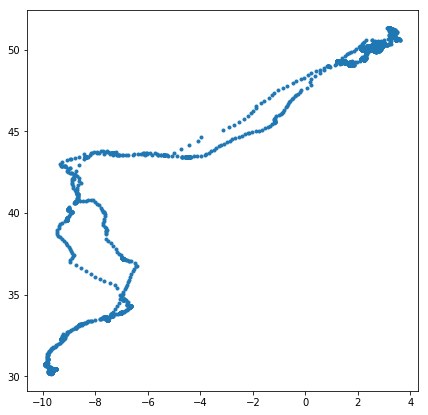

In [3]:
import matplotlib.pyplot as plt
import numpy as np
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, ".")
plt.show()

Let's then plot the trajectories for all three birds in a single plot.

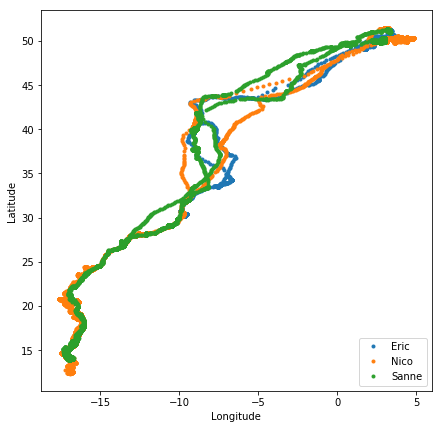

In [4]:
bird_names = pd.unique(birddata.bird_name)

plt.figure(figsize=(7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, ".", label=bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

### Simple Data Visualizations: Question 1
  
Which pandas function extracts all the unique values in a pd.Series?  
- pd.intersect
- pd.unique
- pd.set
- pd.only
  
ANSWER: pd.unique

### Examining Flight Speed
- Learn how to examine 2D flight speed of the birds
- Learn how to deal with data entries that are not numeric
  
The data also contain estimates of two dimensional speeds of the birds. That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.  
  


In [5]:
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]

In [6]:
plt.hist(speed)

ValueError: max must be larger than min in range parameter.

We get an error. we'll try the first 10 entries

In [7]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

In [8]:
np.isnan(speed)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
19765    False
19766    False
19767    False
19768    False
19769    False
19770    False
19771     True
19772    False
19773    False
19774    False
19775    False
19776    False
19777    False
19778     True
19779    False
19780    False
19781    False
19782    False
19783    False
19784    False
19785    False
19786    False
19787    False
19788    False
19789    False
19790    False
19791    False
19792    False
19793    False
19794    False
Name: speed_2d, Length: 19795, dtype: bool

In [9]:
np.isnan(speed).any()

True

In [10]:
np.sum(np.isnan(speed))

85

In [11]:
ind = np.isnan(speed)

In [12]:
~ind

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
19765     True
19766     True
19767     True
19768     True
19769     True
19770     True
19771    False
19772     True
19773     True
19774     True
19775     True
19776     True
19777     True
19778    False
19779     True
19780     True
19781     True
19782     True
19783     True
19784     True
19785     True
19786     True
19787     True
19788     True
19789     True
19790     True
19791     True
19792     True
19793     True
19794     True
Name: speed_2d, Length: 19795, dtype: bool

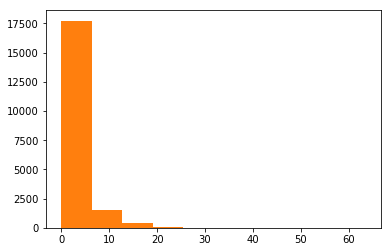

In [13]:
plt.hist(speed[~ind])
plt.show()

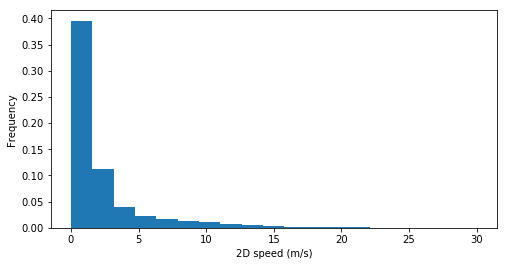

In [14]:
plt.figure(figsize=(8,4))
speed = birddata.speed_2d[birddata.bird_name == "Eric"]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins=np.linspace(0,30,20), normed=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")
plt.show()

Histogram using pandas  
  
The benefit of using pandas in this case was that we did not have to deal with NaNs explicitly. Instead, all of that happens under the hood.

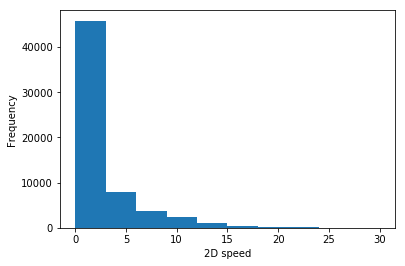

In [15]:
birddata.speed_2d.plot(kind='hist', range=[0,30])
plt.xlabel("2D speed")
plt.show()

### Examining Flight Speed: Question 1
Which numpy method returns True for values that are not numericals?
- np.notnum
- np.isna
- np.isnan
- np.is_nan
  
ANSWER: np.isnan

###  Using Datetime
- Learn how deal with timestamped data using datetime
- Learn how to measure elapsed time
  
If we'd like to operate on the time and date stamps, such as finding out how much time has elapsed between any two timestamps,
we first need to convert them into so-called daytime object, that supports our arithmetic operations.

In [16]:
birddata.columns

Index(['altitude', 'date_time', 'device_info_serial', 'direction', 'latitude',
       'longitude', 'speed_2d', 'bird_name'],
      dtype='object')

In [17]:
birddata.date_time[0:5]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
4    2013-08-15 02:17:42+00
Name: date_time, dtype: object

In [18]:
import datetime
datetime.datetime.today()

datetime.datetime(2017, 7, 26, 19, 20, 52, 309792)

In [19]:
time_1 = datetime.datetime.today()

In [20]:
time_2 = datetime.datetime.today()

In [21]:
time_2 - time_1

datetime.timedelta(0, 1, 793523)

If we'd like to compute how much time has passed between any two observations in our data set, we first have to convert the timestamps, now given as strings, to datetime objects. Let's investigate the first timestamp in a bit more detail. Here is the field following second is UTC, which stands for coordinated universal time, which is an offset that is expressed in hours.
In this case those entries are always 0, something you can check easily. Since the offsets are all 0, we're going to ignore them moving forward. Let's first pull out the first timestamp from our data set.  
  
2013-08-15 00:18:08+00  
(+00 is UTC)

In [22]:
date_str = birddata.date_time[0]

In [23]:
type(date_str)

str

In [24]:
date_str

'2013-08-15 00:18:08+00'

In [25]:
date_str[:-3]

'2013-08-15 00:18:08'

In [26]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [27]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [28]:
timestamps[0:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [29]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

In [30]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [31]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

In [32]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elasped_time = [time - times[0] for time in times]

In [33]:
elasped_time[0]

Timedelta('0 days 00:00:00')

In [34]:
elasped_time[1000]

Timedelta('12 days 02:02:00')

But how can we measure time in certain units, like hours or days?

In [35]:
elasped_time[1000] / datetime.timedelta(days=1)

12.084722222222222

In [36]:
elasped_time[1000] / datetime.timedelta(hours=1)

290.03333333333336

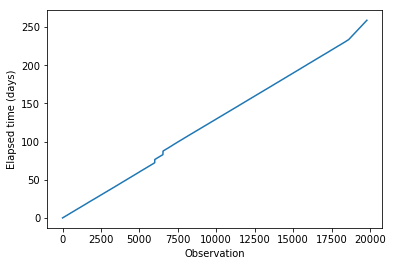

In [37]:
plt.plot(np.array(elasped_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.show()

### Using Datetime: Question 1
What does datetime.datetime.strptime do?
- Takes in a date and time string, as well as an expected format string, and returns a formatted datetime object.
- Takes in a datetime object, and strips away elements specified in the second argument.
  
ANSWER: Takes in a date and time string, as well as an expected format string, and returns a formatted datetime object.
  
### Using Datetime: Question 2
How can you find the difference in time between two datetime objects time_1 and time_2?  
- time_2 - time_1
- time.diff(time_1, time_2)
- time_1.diff(time_2)
  
ANSWER: time_2 - time_1

### Calculating Daily Mean Speed
- Learn how to calculate and plot daily mean speed  
  
y-axis - mean daily speed  
x-axis - time measured in days  
  
our data consists of time stamps which are spaced unevenly. 
multiple data points on x-axis for each day and we need to calculate the mean speed for each day  
so we need to determine if the speed is for a particular day and once we get the next date data  
we should calculate the speed for that date.  
  


In [38]:
data = birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]   # time from the data point 0 (starting point)
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)


In [40]:
next_day = 1    # to keep track of each day data
inds = []      # to store the speed for that date
daily_mean_speed =[]    # list to keep track of all of daily mean speed
for (i, t) in enumerate(elapsed_days):    # loop index and time 
    if t < next_day:
        inds.append(i)
    else:
        # compute mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []         
        

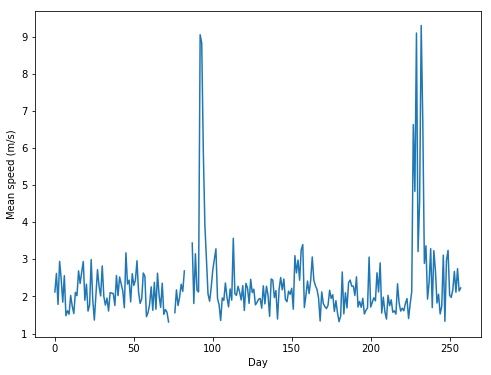

In [41]:
plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.show()

So looking at the plot, we first see that we have data for approximately 260 days. On any given typical, or average day, Eric
is flying, on average, about 2 meters per second, just by eyeballing the figure. However, we can see that there seemed to be two periods within the observation window during which Eric is flying substantially more. These are the periods that correspond to his migration patterns. We can see that around day, equal to 90 or 95 perhaps, his mean daily speed is as high as 9 meters per second. We see a similar peak for day perhaps 230 or so. Looking at this plot, we've been able to identify when exactly Eric carries out his migration. The next step we'd like to accomplish is to find out where he actually migrates from and where does he end up.

### Calculating Daily Mean Speed
Read in the bird_tracking.csv data (provided along with Video 4.2.2) and take a look at Sanne's flight times. Which is the earliest recorded timestamp in the dataset for Sanne?  
- 2013-08-15 00:20:45
- 2013-08-15 00:01:08
- 2013-08-15 00:03:25
- 2013-08-15 00:18:08
  
ANSWER: 2013-08-15 00:01:08

In [42]:
data = birddata[birddata.bird_name == "Sanne"]

In [43]:
data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
40916,55,2013-08-15 00:01:08+00,833,-91.499509,49.931065,2.281893,0.372156,Sanne,2013-08-15 00:01:08
40917,54,2013-08-15 00:31:00+00,833,-141.804053,49.931076,2.281900,1.318484,Sanne,2013-08-15 00:31:00
40918,55,2013-08-15 01:01:19+00,833,-10.651840,49.931016,2.281933,0.076158,Sanne,2013-08-15 01:01:19
40919,56,2013-08-15 01:31:38+00,833,14.727689,49.931053,2.281911,0.014142,Sanne,2013-08-15 01:31:38
40920,55,2013-08-15 02:01:24+00,833,-169.882200,49.931042,2.281893,0.094340,Sanne,2013-08-15 02:01:24


In [46]:
data.date_time.min()

'2013-08-15 00:01:08+00'

### Using the Cartopy Library
- Learn how to download and install Cartopy, a library that provides cartographic tools for Python
- Learn how to use Cartopy to plot data on a cartographic projection
  
Search for 'cartopy'
<a href="http://scitools.org.uk/cartopy/">first link</a>    
<a href="http://scitools.org.uk/cartopy/docs/latest/index.html">Release documentation</a>    
To install cartopy  
Command prompt  -   conda install -c scitools cartopy  
Got an error  
Managed to install with the following conda install -c conda-forge cartopy  
  


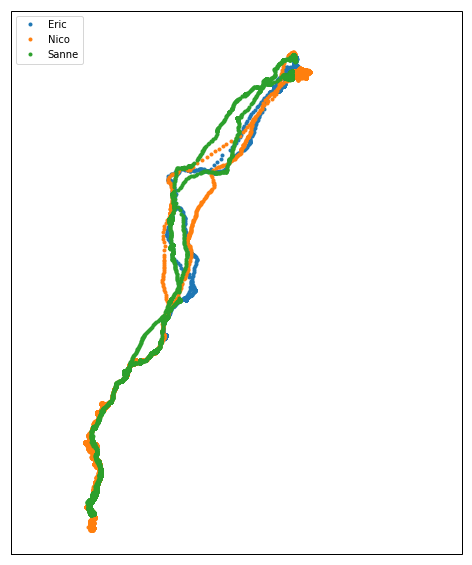

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
plt.show()

C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


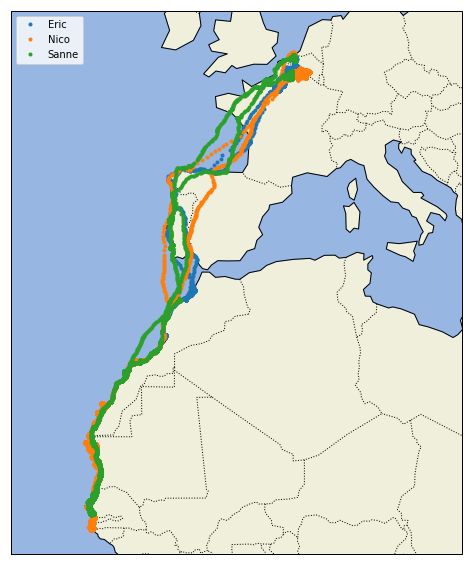

In [48]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label=name)

plt.legend(loc="upper left")
plt.show()

### Using the Cartopy Library: Question 1
Looking at the cartopy plot from Video 4.2.6, do the birds in this dataset prefer to fly over land, sea, or the coast when migrating?  
- Land
- Sea
- The Coast
  
ANSWER: The Coast

### Case Study 5
#### Exercise 1
In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.  
  
pandas makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. The sample code shows you how to group the dataframe by birdname and then find the average speed_2d for each bird. Modify the code to assign the mean altitudes of each bird into an object called mean_altitudes.

In [50]:
# First, use `groupby` to group up the data.
grouped_birds = birddata.groupby("bird_name")

# Now operations are performed on each group.
mean_speeds = grouped_birds.speed_2d.mean()

# The `head` method prints the first 5 lines of each bird.
grouped_birds.head()

# Find the mean `altitude` for each bird.
# Assign this to `mean_altitudes`.
#  mean_altitudes = ## YOUR CODE HERE ##
mean_altitudes = grouped_birds.altitude.mean()
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

#### Exercise 2
- In this exercise, we will group the flight times by date and calculate the mean altitude within that day. Use groupby to group the data by date.
- Calculate the mean altitude per day and store these results as mean_altitudes_perday

In [53]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata["date"] = birddata.date_time.dt.date

# Check the head of the column.
birddata.date.head()

## grouped_bydates = ## YOUR CODE HERE ##
grouped_bydates = birddata.groupby("date")

# mean_altitudes_perday = ## YOUR CODE HERE ##
mean_altitudes_perday = grouped_bydates.altitude.mean()

#### Exercise 3
- birddata already contains the date column. To find the average speed for each bird and day, create a new grouped dataframe called grouped_birdday that groups the data by both bird_name and date.

In [54]:
## grouped_birdday = ## YOUR CODE HERE ##
grouped_birdday = grouped_birdday =  birddata.groupby(["bird_name", "date"])

mean_altitudes_perday = grouped_birdday.altitude.mean()

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()


bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

#### Exercise 4
- Great! Now find the average speed for each bird and day. Store these are three pandas Series objects – one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

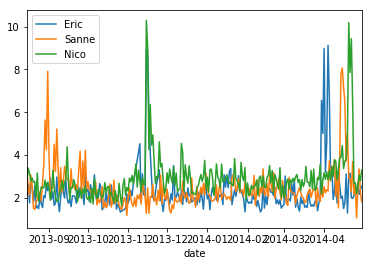

In [55]:
# eric_daily_speed  = # Enter your code here.
eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]

# sanne_daily_speed = # Enter your code here.
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]

# nico_daily_speed  = # Enter your code here.
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()